In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
data = np.array(pd.read_excel('data/CustomerDataSet.xls')[['ItemsBought', 'ItemsReturned']])

In [3]:
checks = data.copy()

In [4]:
def MinMaxScalar(x):
    
    #np.min(data , axis =0 -> 열 1-> 행) 열에서 최솟갑을 얻을 것이냐
    
    numerator = x - np.min(x,0)
    denominator = np.max(x,0) - np.min(x,0)
    
    return numerator / (denominator+1e-5)


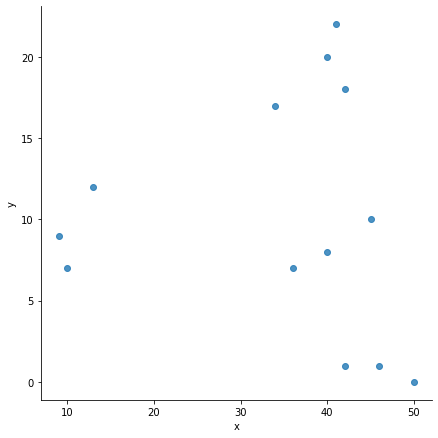

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in checks],
        "y": [v[1] for v in checks]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [8]:
k = 4
vectors = tf.constant(checks) # change tensor from data
centroides = tf.Variable(tf.slice(tf.random.shuffle(vectors), [0,0],[k,-1] ))
expanded_vectors = tf.expand_dims(vectors, 0) #0번째 차원 확장 추가
expanded_centroides = tf.expand_dims(centroides, 1) # 1번째 차원 확장 추가

In [22]:
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)
#L2 거리 계산법을 통해 최고 가까운 centeroid를 찾는다.

In [66]:

def get_cluster_means(idx,data,value):
    
    mid = tf.equal(data,idx)
    #print("first ",mid)
    mid = tf.where(mid)
    #print("second ", mid)
    mid = tf.reshape(mid,[1,-1])
    #print("third ",mid)
    mid = tf.gather(value,mid)
    #print("fouth ",mid)
    mean = tf.reduce_mean(mid,axis = 1)
    #print("final ",mean)
    return mean



means = tf.concat([get_cluster_means(c,assignments,vectors) for c in range(k)],axis = 0)



In [69]:
upload_centroides = tf.compat.v1.assign(centroides,means)

In [74]:
init_op = tf.compat.v1.global_variables_initializer()

In [77]:
sess = tf.compat.v1.Session()
sess.run(init_op)
for step in range(100):
   _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])


RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().